In [47]:
import random
import matplotlib.pyplot as plt
import numpy as np


from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [94]:
# Generate some data
num_particles = 5
num_points = 1000

dataset = {}
for p in range(num_points):
    particle_id = random.randint(0, num_particles-1)
    x, y = random.randint(0, 1000), random.randint(0, 1000)
    dataset[(x, y)] = particle_id

dataset = [(particle_id, x, y) for (x, y), particle_id in dataset.items()]
dataset

[(1, 729, 367),
 (0, 978, 44),
 (1, 299, 770),
 (0, 168, 454),
 (3, 687, 633),
 (0, 694, 684),
 (1, 946, 557),
 (4, 468, 349),
 (0, 854, 196),
 (4, 238, 544),
 (1, 229, 591),
 (1, 812, 74),
 (4, 424, 498),
 (3, 783, 941),
 (2, 691, 987),
 (3, 832, 651),
 (2, 304, 202),
 (2, 449, 921),
 (4, 242, 232),
 (2, 976, 945),
 (3, 138, 577),
 (4, 180, 163),
 (3, 720, 100),
 (3, 702, 72),
 (2, 977, 889),
 (1, 261, 72),
 (3, 433, 348),
 (3, 772, 498),
 (0, 29, 540),
 (0, 696, 965),
 (2, 12, 705),
 (0, 552, 233),
 (1, 407, 14),
 (1, 79, 558),
 (1, 375, 99),
 (2, 691, 858),
 (2, 688, 827),
 (0, 335, 259),
 (2, 827, 26),
 (2, 628, 625),
 (1, 168, 631),
 (3, 19, 27),
 (0, 530, 328),
 (1, 156, 732),
 (3, 283, 666),
 (3, 117, 774),
 (2, 713, 86),
 (3, 908, 225),
 (1, 923, 511),
 (4, 139, 260),
 (1, 126, 280),
 (2, 372, 93),
 (3, 66, 784),
 (0, 272, 280),
 (0, 833, 302),
 (4, 642, 404),
 (4, 496, 910),
 (0, 400, 334),
 (3, 693, 362),
 (4, 868, 721),
 (4, 63, 402),
 (4, 88, 297),
 (1, 897, 900),
 (0, 269,

In [95]:
particles = {}
for particle_id, x, y in dataset:
    if particle_id not in particles:
        particles[particle_id] = []
    particles[particle_id].append((x, y))

In [99]:
for particle_id, points in particles.items():
    print(points)

[(729, 367), (299, 770), (946, 557), (229, 591), (812, 74), (261, 72), (407, 14), (79, 558), (375, 99), (168, 631), (156, 732), (923, 511), (126, 280), (897, 900), (191, 449), (71, 166), (450, 748), (861, 252), (931, 466), (296, 933), (357, 533), (228, 492), (984, 169), (643, 66), (898, 530), (421, 756), (76, 833), (714, 858), (565, 197), (967, 679), (133, 327), (157, 526), (289, 188), (173, 699), (516, 175), (204, 339), (329, 430), (194, 736), (483, 6), (400, 621), (453, 19), (680, 335), (41, 276), (126, 141), (568, 727), (666, 768), (750, 94), (406, 190), (99, 944), (146, 866), (967, 457), (770, 532), (180, 290), (344, 594), (105, 949), (339, 151), (73, 959), (749, 83), (987, 247), (103, 389), (176, 916), (837, 829), (667, 475), (114, 494), (245, 619), (920, 543), (319, 354), (872, 92), (726, 868), (269, 417), (500, 588), (540, 963), (674, 858), (812, 176), (515, 62), (10, 143), (543, 298), (429, 661), (103, 412), (846, 814), (605, 414), (668, 553), (643, 12), (503, 516), (630, 618),

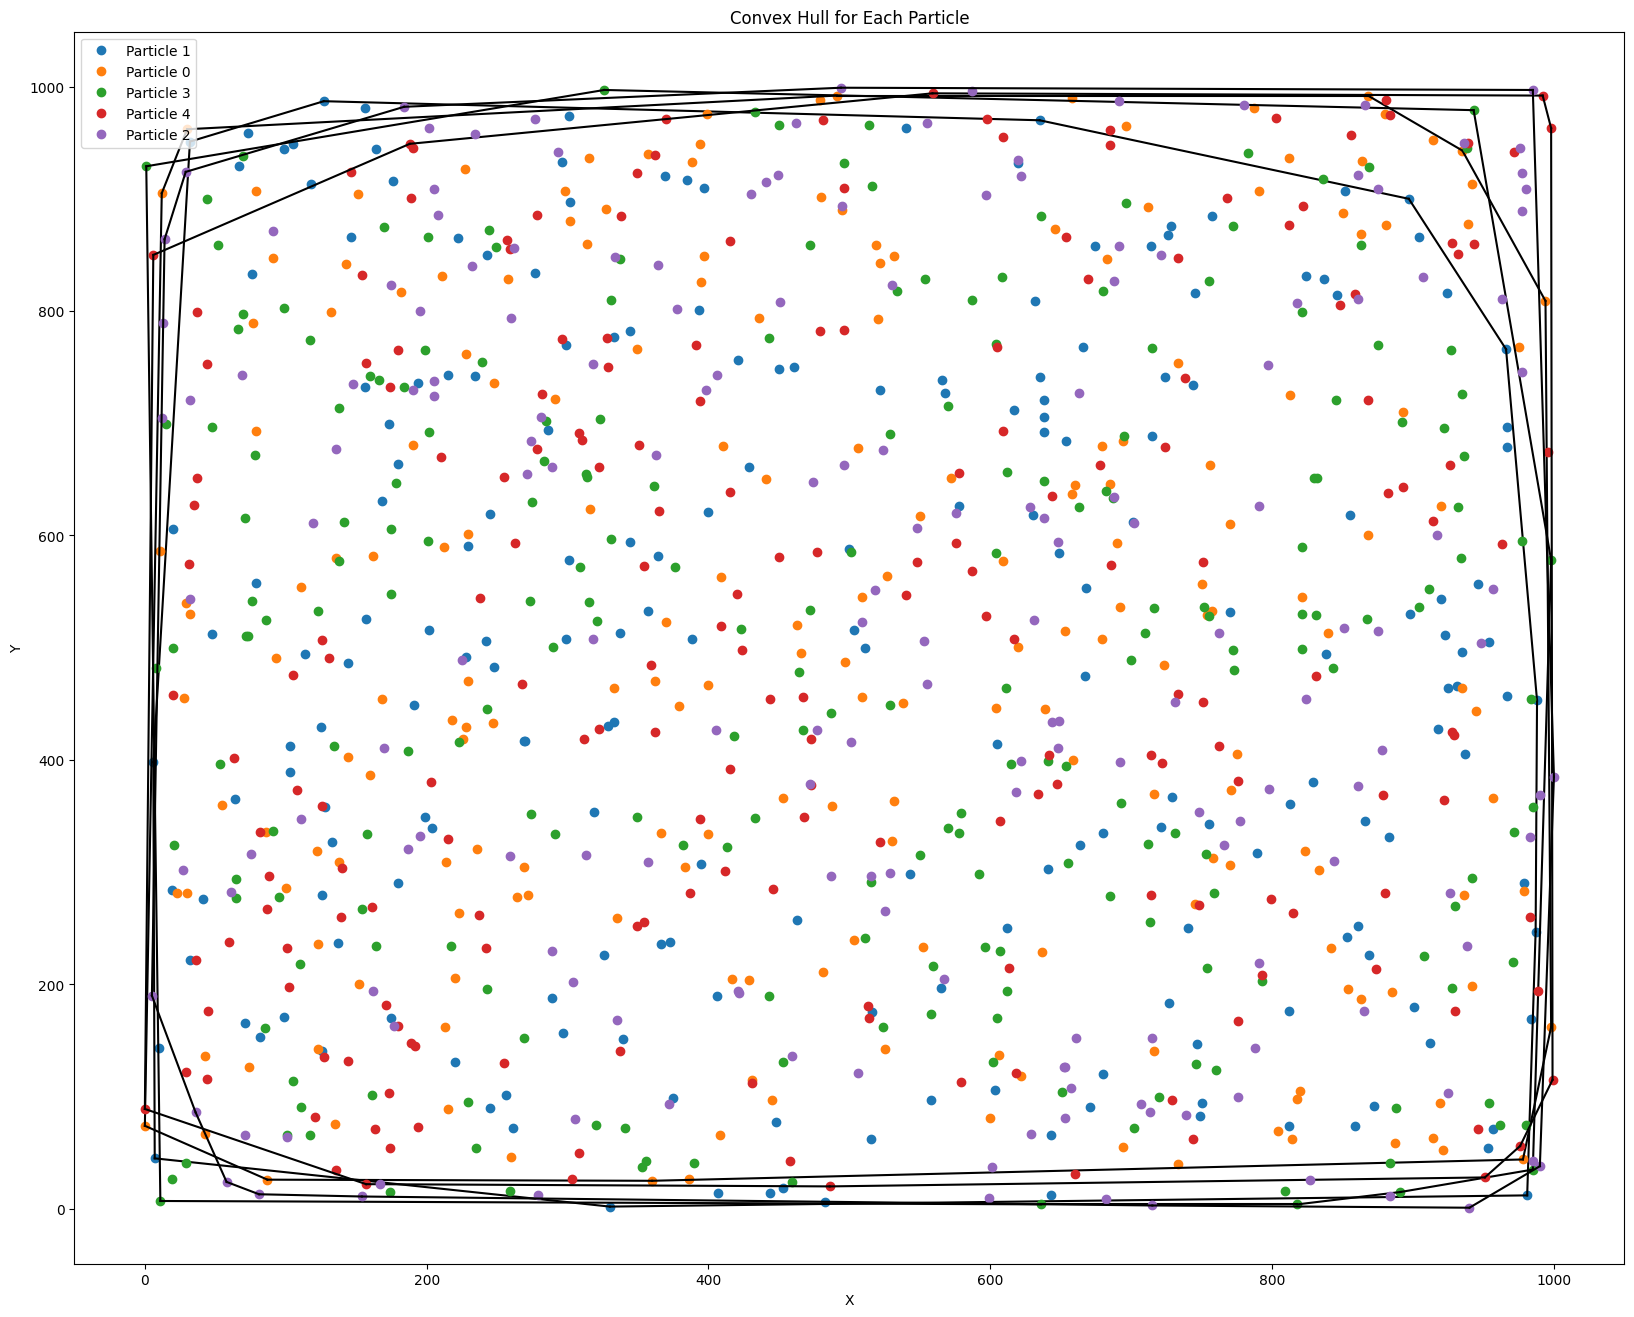

In [104]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
for particle_id, points in particles.items():
    points = np.array(points)
    
    if len(points) >= 3:  # Cần ít nhất 3 điểm để tạo convex hull
        hull = ConvexHull(points)
        
        plt.plot(points[:, 0], points[:, 1], 'o', label=f'Particle {particle_id}')
        
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    else:
        plt.plot(points[:, 0], points[:, 1], 'o', label=f'Particle {particle_id}')
        
        
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull for Each Particle')
plt.legend()
plt.show()

In [2]:
import numpy as np
import pandas as pd

# Tạo dữ liệu mẫu
data = {
    'particle_id': [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
    'x': [1, 2, 3, 5, 6, 7, 2, 3, 4, 5],
    'y': [1, 1, 4, 5, 2, 6, 4, 3, 2, 7]
}

df = pd.DataFrame(data)
print(df)


   particle_id  x  y
0            1  1  1
1            1  2  1
2            1  3  4
3            2  5  5
4            2  6  2
5            2  7  6
6            3  2  4
7            3  3  3
8            3  4  2
9            3  5  7


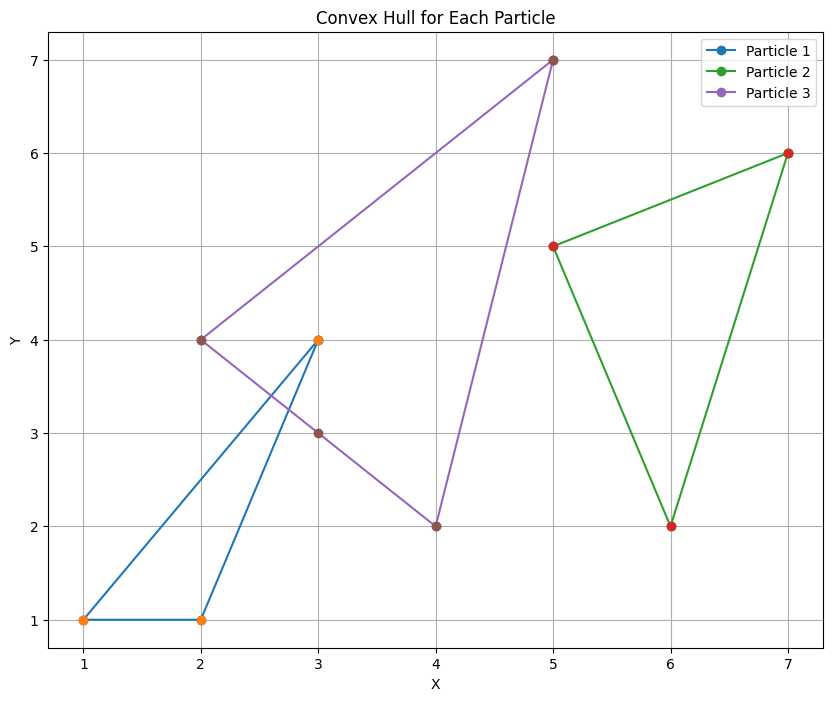

In [3]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

def plot_convex_hull(df):
    # Lấy danh sách các particle_id
    particles = df['particle_id'].unique()
    
    plt.figure(figsize=(10, 8))
    
    for p_id in particles:
        # Lọc điểm của từng particle
        points = df[df['particle_id'] == p_id][['x', 'y']].values
        
        # Tính toán Convex Hull
        if len(points) > 2:  # Cần ít nhất 3 điểm để có convex hull
            hull = ConvexHull(points)
            hull_points = np.append(points[hull.vertices], [points[hull.vertices][0]], axis=0)
            plt.plot(hull_points[:, 0], hull_points[:, 1], 'o-', label=f'Particle {p_id}')
        
        # Vẽ các điểm
        plt.plot(points[:, 0], points[:, 1], 'o')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull for Each Particle')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_convex_hull(df)
